In [1]:
import nb_utils
import torch
import numpy as np
import matplotlib.pyplot as plt
from lightning_modules.BaseSdeGenerativeModel import BaseSdeGenerativeModel
from models.fcn import FCN
import pickle
from plot_utils import plot_spectrum

Moving cwd to /store/CIA/js2164/repos/diffusion/score_sde_pytorch


/store/CIA/js2164/conda_envs/score_sde/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
#path = 'logs/ksphere/n_1/dim_10/random_isometry/uniform_random/svd/svd_9000.pkl'
path = 'logs/ksphere/n_1/dim_50/random_isometry/uniform_random/svd/svd_14000.pkl'
#path = 'logs/line/sine_line/svd/svd_26500.pkl'
#path = 'logs/mammoth/ve_random/svd/svd_16500.pkl'
with open(path, 'rb') as f:
    svd = pickle.load(f)

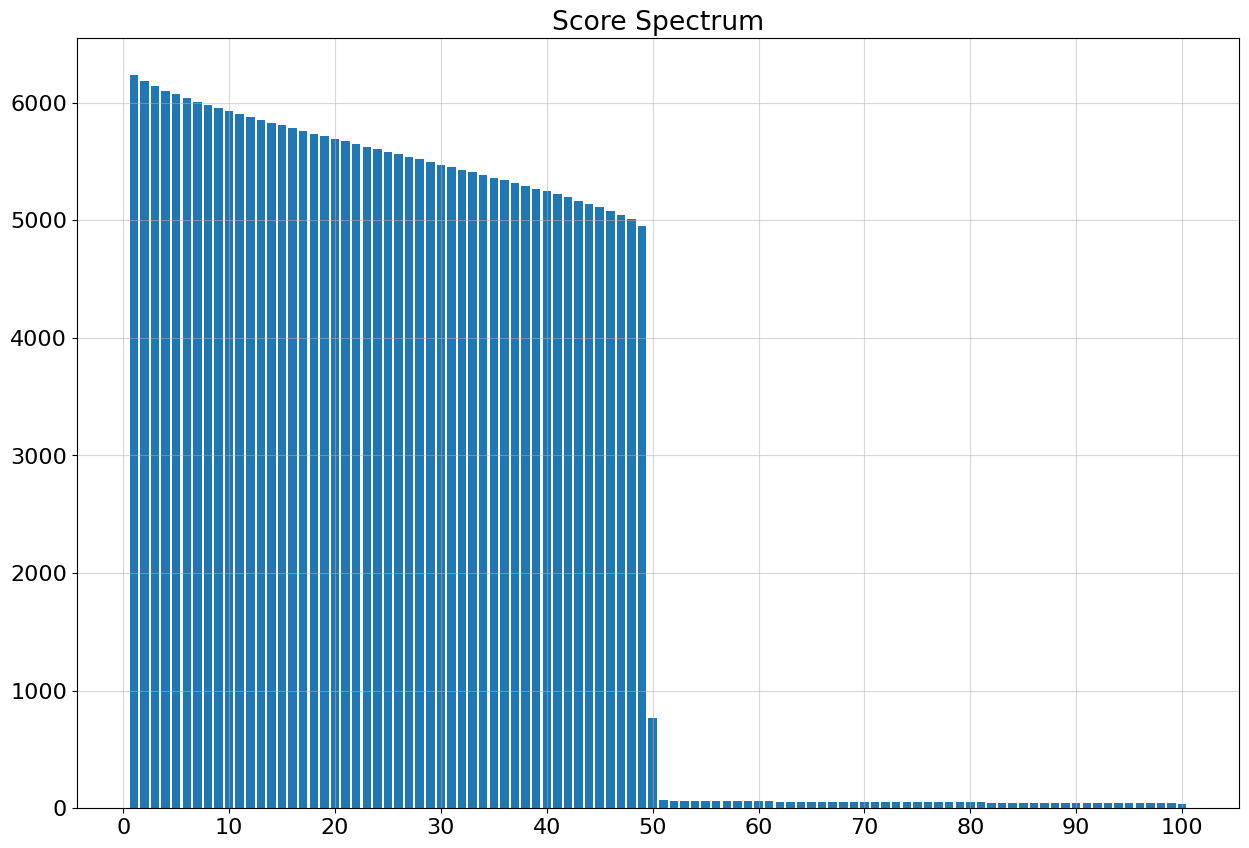

In [19]:
singular_vals = svd['singular_values']
plot_spectrum(singular_vals)

In [20]:
def softmax(x):
        """Compute softmax values for each sets of scores in x."""
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=0) # only difference

In [21]:
s=singular_vals[0]
norm_factor = s[1]-s[2]
diff = [(s[i]-s[i+1])/norm_factor for i in range(1, len(s)-1)]
soft = softmax(diff)
print(len(soft)-soft.argmax())

51
